In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import yaml
import os
from glob import glob

In [2]:
%matplotlib inline

In [3]:
Q2_DIR = '/Users/mbedell/python/q2/'
DATA_DIR = '/Users/mbedell/Documents/Research/tauceti/tauceti_lily/'

In [4]:
import sys
sys.path.append(Q2_DIR)
import q2

In [5]:
data = q2.Data(DATA_DIR+'stars.csv', DATA_DIR+'lines.csv')

In [6]:
ref = q2.Star('achi131125.1120_cnorm')
ref.get_data_from(data)

In [7]:
assert np.all(np.isfinite(ref.linelist['ew'])) # make sure my nan fix in q2 worked

In [8]:
sp = q2.specpars.SolvePars()
sp.step_teff = 20
sp.step_logg = 0.1
sp.step_vt = 0.1
sp.niter = 100
sp.grid = 'odfnew'
sp.errors = True

pp = q2.specpars.PlotPars()
pp.figure_format = 'png'

------------------------------------------------------
Initializing ...
- Date and time: 26-Apr-2022, 17:08:39
- Model atmospheres: odfnew
- Star data: /Users/mbedell/Documents/Research/tauceti/tauceti_lily/stars.csv
- Line list: /Users/mbedell/Documents/Research/tauceti/tauceti_lily/lines.csv
------------------------------------------------------

*********************
achi131125.1120_cnorm
*********************
Reference star. No calculations needed.
it Teff logg [Fe/H]  vt           [Fe/H]
-- ---- ---- ------ ----      --------------
 0 5342 4.51 -0.530 0.86 --->  0.000+/-0.000
--
------------------------------------------------------
   D[Fe/H]    ||    D[Fe/H] Fe I   |   D[Fe/H] Fe II
 0.000  0.000 ||  0.000  0.000   0 |  0.000  0.000   0
------------------------------------------------------

*********************
achi150118.1126_cnorm
*********************
it Teff logg [Fe/H]  vt           [Fe/H]
-- ---- ---- ------ ----      --------------
 0 5342 4.51 -0.530 0.86 ---> -0.004+/

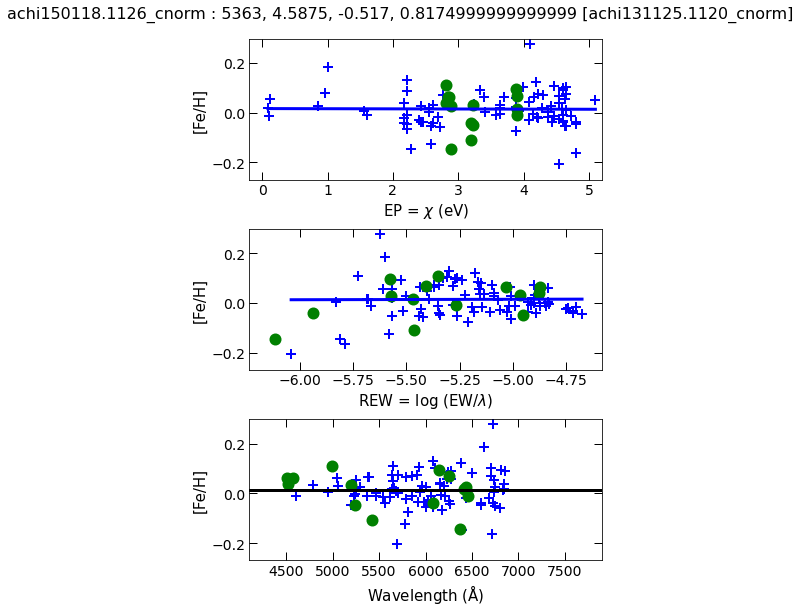

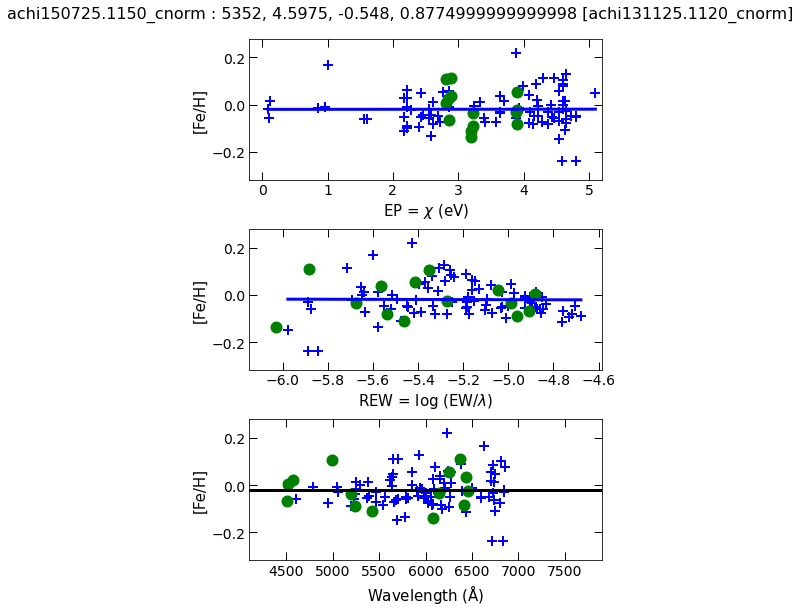

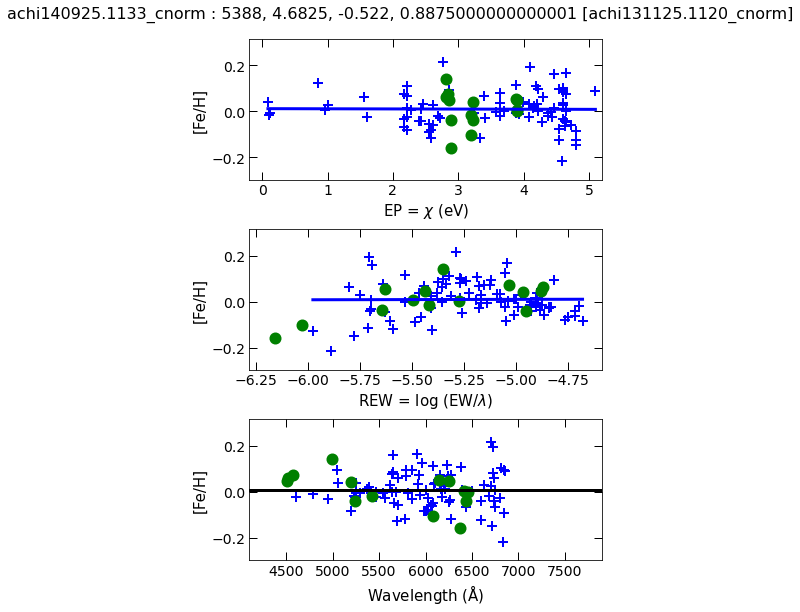

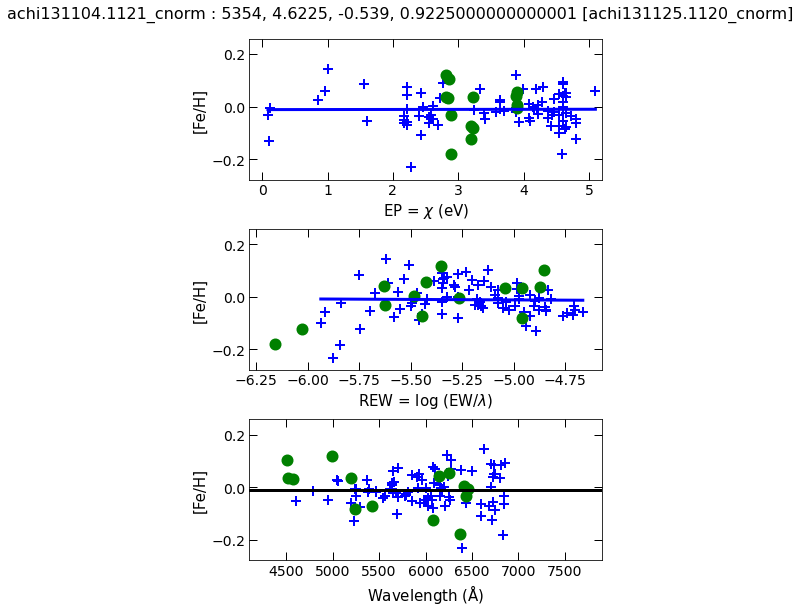

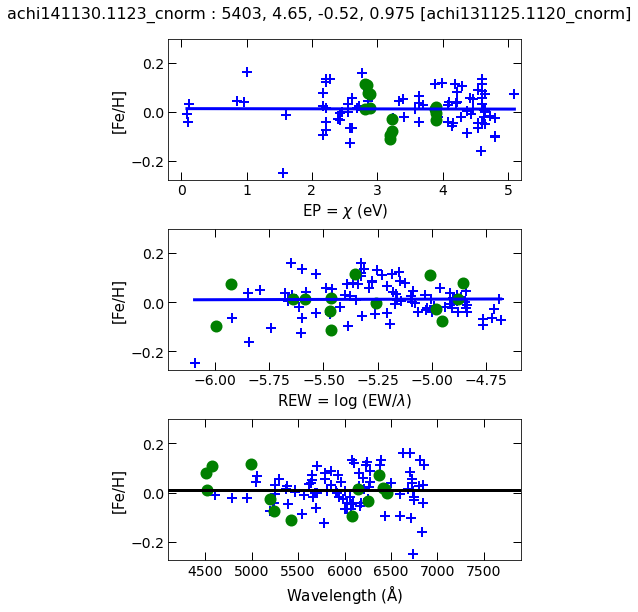

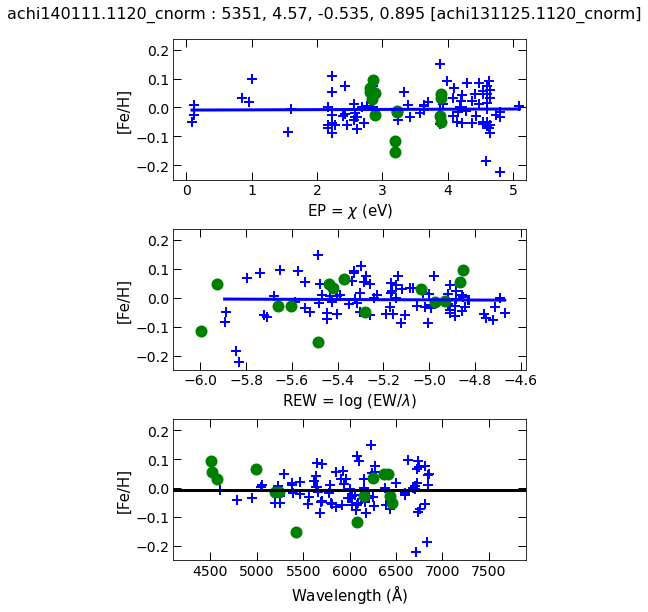

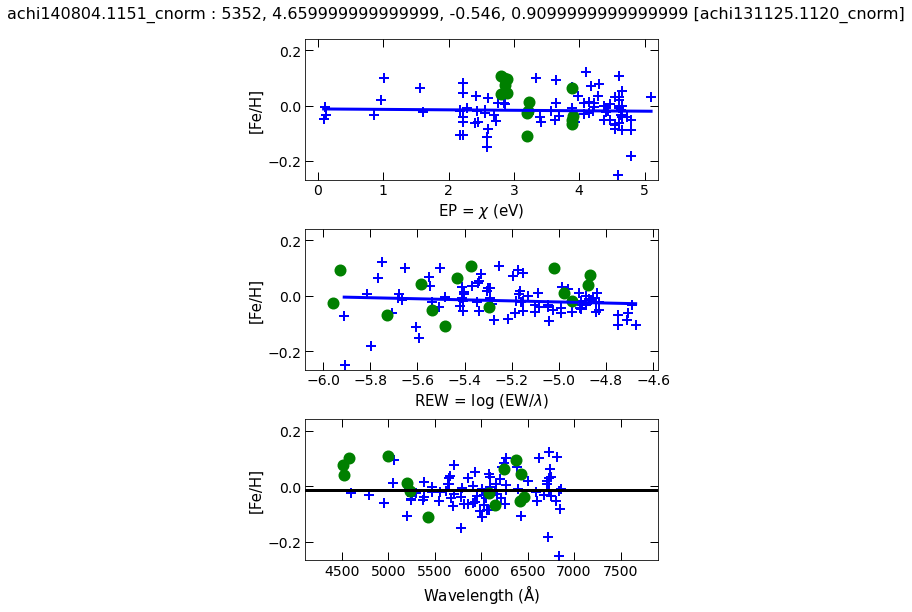

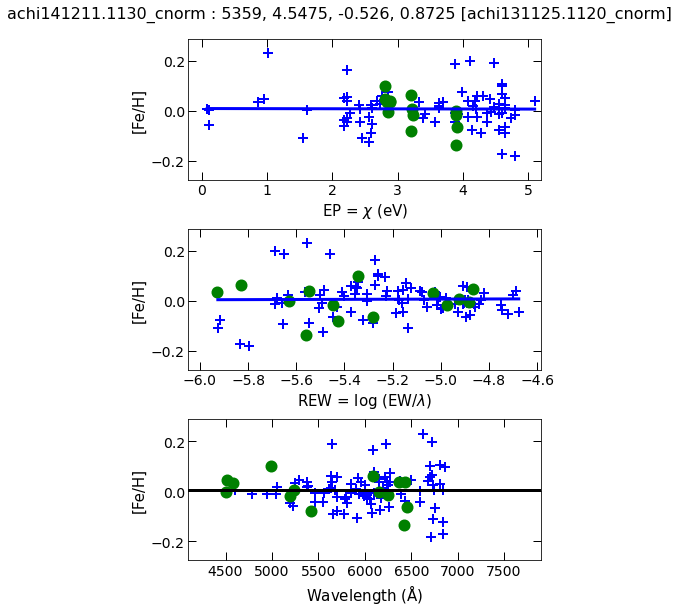

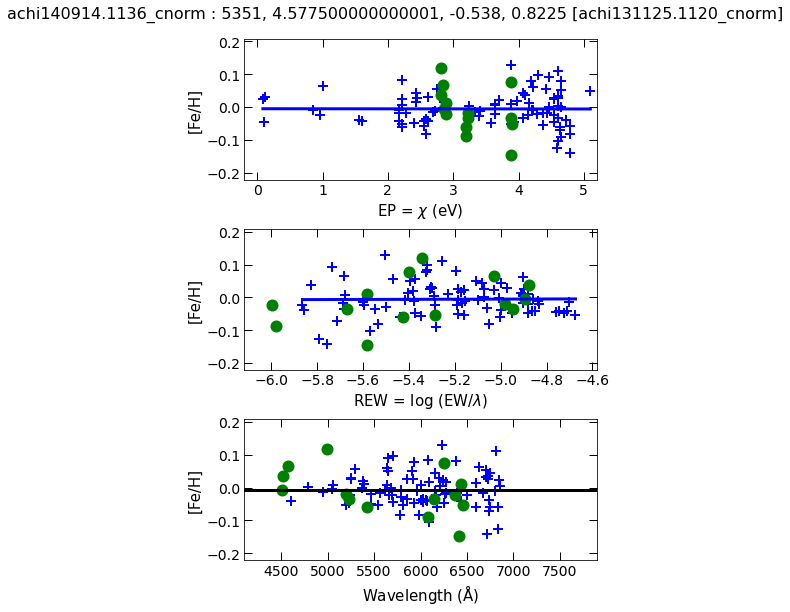

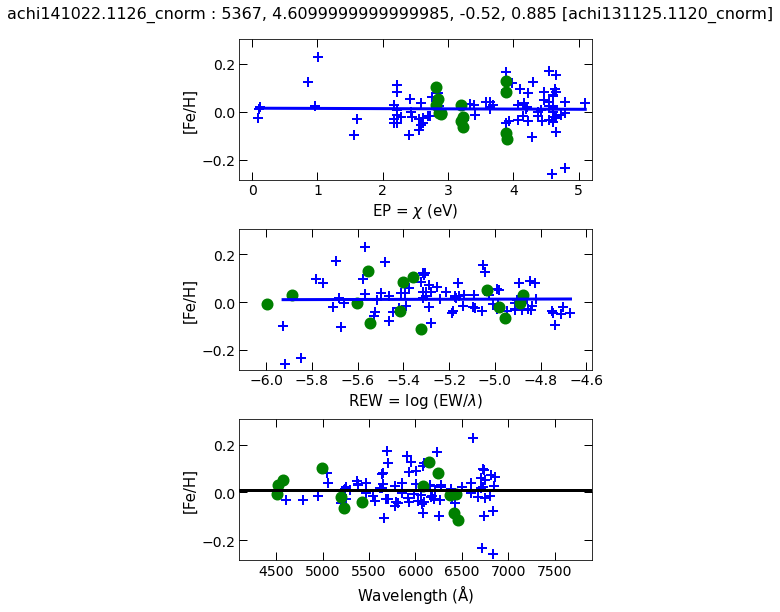

In [9]:
reference = 'achi131125.1120_cnorm'

q2.specpars.solve_all(data, sp, 'param.csv', reference, PlotPars=pp)

In [10]:
metadata = Table.read(DATA_DIR+'metadata.csv')
param = Table.read('param.csv')

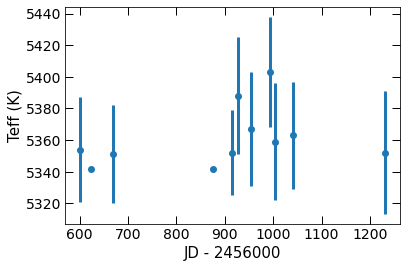

In [16]:
plt.errorbar(metadata['date'] - 2456000, param['teff'], yerr=param['err_teff'], ls='', marker='.')
plt.xlabel('JD - 2456000')
plt.ylabel('Teff (K)');